In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve

In [3]:
# 定义网格单元结构体
class GridCell:
    def __init__(self):
        self.id = 0 # 网格单元编号
        self.parent_id = 0 # 父单元编号
        self.child_id = [0,0] # 两个子单元编号，若无子单元则为0
        self.xmin = 0.0 # 单元格的左边界
        self.xmax = 0.0 # 单元格的右边界
        self.leaf_id = 0 # 叶子单元编号，若不是叶子单元则为0

In [4]:
# 定义产生随机数的函数
def generate_random_int(Lid):
    return random.choice(Lid)

In [5]:
# 定义构建网格的函数
def construct_grid(grid, leaf_id, parent_id, xmin, xmax):
    cell = GridCell() # 构建网格单元
    cell.id = len(grid) + 1 # 网格单元编号
    cell.parent_id = parent_id # 父单元编号
    cell.xmin = xmin # 单元格左边界
    cell.xmax = xmax # 单元格右边界
    cell.leaf_id = leaf_id # 叶子单元编号
    # 新单元格无子单元
    cell.child_id[0] = 0
    cell.child_id[1] = 0
    grid.append(cell) # 将新的元素加到list的最后面，位置为当前最后一个元素的下一个元素

In [6]:
# 定义细化网格的函数
def refinement_grid(Lid, grid, leaf_id, parent_id, xmin, xmax, rand_idx):
    if grid[rand_idx].leaf_id != 0:
        grid[rand_idx].leaf_id = 0
    construct_grid(grid, leaf_id, parent_id, xmin, (xmax+xmin) / 2.0)
    Lid.append(grid[-1].id)
    grid[rand_idx].child_id[0] = len(grid)
    leaf_id += 1
    construct_grid(grid, leaf_id, parent_id, (xmax+xmin) / 2.0, xmax)
    Lid.append(grid[-1].id)
    grid[rand_idx].child_id[1] = len(grid)


In [7]:
#定义查找最小网格函数
def find_ml(Lid, grid):
    fmin = grid[Lid[0]-1].xmax - grid[Lid[0]-1].xmin
    for i in Lid:
        if grid[i-1].xmax - grid[i-1].xmin < fmin:
            fmin = grid[i-1].xmax - grid[i-1].xmin
    return fmin

In [8]:
# 定义随机加密网格函数
def random_refinement_grid(Lid, N, grid, leaf_id, XMax, XMin, M):
    limt = (XMax-XMin)/(M*(2**(N-1)))
    min_length = find_ml(Lid, grid)#查找最小网格
    print("min_length",min_length)
    if min_length >= limt : # 网格细化条件
        # 随机选择一个叶子单元进行加密
        rand_idx = generate_random_int(Lid)
        parent_id = grid[rand_idx-1].id

        # 对选中的网格单元进行加密
        xmin = grid[rand_idx-1].xmin
        xmax = grid[rand_idx-1].xmax
        if xmax - xmin > limt:
            refinement_grid(Lid, grid, leaf_id, parent_id, xmin, xmax, rand_idx-1)
            # 在Lid中删除已加密的网格单元
            Lid.remove(rand_idx)
        else:
            random_refinement_grid(Lid, N, grid, leaf_id, XMax, XMin, M)
    else:
        exit()

In [9]:
# 更新网格单元的叶子单元编号
def update_leaf_id(Lid, grid):
    for n in range(1,len(grid)):
        if grid[n].id in Lid:
            grid[n].leaf_id = Lid.index(grid[n].id)+1

In [10]:
def bubbleSort(iList1):
    """冒泡排序"""
    if len(iList1) <=1:
        return iList1
    for i in range(1,len(iList1)):
        for j in range(0,len(iList1)-i):
            if iList1[j].xmin >= iList1[j+1].xmin:
                iList1[j], iList1[j+1] = iList1[j+1], iList1[j]
    return iList1

In [11]:
#快速排序
def quicksort_by_xmin(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = []
    right = []
    for i in range(1, len(arr)):
        #print(arr[i].xmin)
        if arr[i].xmin < pivot.xmin:
            left.append(arr[i])
        else:
            right.append(arr[i])
    return quicksort_by_xmin(left) + [pivot] + quicksort_by_xmin(right)

def sort_leaf_by_xmin(grid,sorted_Lid):
    # 创建一个空列表，用于存储所有的叶子结点
    leaf_nodes = []

    # 遍历所有单元格，将叶子结点添加到 leaf_nodes 列表中
    for cell in grid:
#         print("cell:")
#         print(cell.id)
#         print(cell.leaf_id)
        if cell.leaf_id != 0:
            leaf_nodes.append(cell)
#     for cell in leaf_nodes:
#         print(cell.xmin)

    # 对叶子结点按照 xmin 属性进行排序
    sorted_leaf_nodes = bubbleSort(leaf_nodes)
    for leaf in sorted_leaf_nodes:
        sorted_Lid.append(leaf.id)
#         print("sored_Lid_xmin")
#         print(leaf.xmin)


In [12]:
def sort_leaf_by_xmin(grid,sorted_Lid):
    # 创建一个空列表，用于存储所有的叶子结点
    leaf_nodes = []

    # 遍历所有单元格，将叶子结点添加到 leaf_nodes 列表中
    for cell in grid:
#         print("cell:")
#         print(cell.id)
#         print(cell.leaf_id)
        if cell.leaf_id != 0:
            leaf_nodes.append(cell)
#     for cell in leaf_nodes:
#         print(cell.xmin)

    # 对叶子结点按照 xmin 属性进行排序
    sorted_leaf_nodes = bubbleSort(leaf_nodes)
    for leaf in sorted_leaf_nodes:
        sorted_Lid.append(leaf.id)
#         print("sored_Lid_xmin")
#         print(leaf.xmin)


In [13]:
def No_OneD_adaptive_mesh_algorithm(xmin, xmax, N, grid, Lid, sorted_Lid, M):
    
    leaf_id = 0

    # 对网格进行加密
    #random_refinement_grid(Lid, N, grid, leaf_id, xmax,xmin, M)
    
    #更新叶子网格编号
    update_leaf_id(Lid, grid)
#     print("OneD_adaptive_mesh_algorithm :")
#     print(Lid)
#     for i in Lid:
#         print(grid[i-1].xmin)
    
    # 对叶子结点按照 xmin 从大到小的属性进行排序，并将编号存储入sorted_Lid
    sort_leaf_by_xmin(grid,sorted_Lid)
#     print("OneD_adaptive_mesh_algorithm sorted_Lid: ")
#     print(sorted_Lid)
#     for i in sorted_Lid:
#         print(grid[i-1].xmin)

In [14]:
def OneD_adaptive_mesh_algorithm(xmin, xmax, N, grid, Lid, sorted_Lid, M):
    
    leaf_id = 0

    # 对网格进行加密
    random_refinement_grid(Lid, N, grid, leaf_id, xmax,xmin, M)
    
    #更新叶子网格编号
    update_leaf_id(Lid, grid)
#     print("OneD_adaptive_mesh_algorithm :")
#     print(Lid)
#     for i in Lid:
#         print(grid[i-1].xmin)
    
    # 对叶子结点按照 xmin 从大到小的属性进行排序，并将编号存储入sorted_Lid
    sort_leaf_by_xmin(grid,sorted_Lid)
#     print("OneD_adaptive_mesh_algorithm sorted_Lid: ")
#     print(sorted_Lid)
#     for i in sorted_Lid:
#         print(grid[i-1].xmin)

In [15]:
# 定义可视化函数
def visualize_1(grid):
    plt.figure(figsize=(10,5)) # 设置画布大小为(10,5)
    for cell in grid: # 遍历网格单元
        #x,y用于绘制矩形边界框的坐标点
        x = [cell.xmin, cell.xmax, cell.xmax, cell.xmin, cell.xmin] #矩形的四个顶点坐标以及第一个顶点的重复坐标
        y = [cell.xmax - cell.xmin, cell.xmax - cell.xmin, cell.xmax - cell.xmin+0.05, cell.xmax - cell.xmin+0.05,cell.xmax - cell.xmin] 
        color = "red" if cell.id in Lid else "blue" # 如果是叶子单元格，则颜色为红色，否则为蓝色
        plt.fill(x, y, color=color, alpha=0.5, edgecolor="black") # 填充网格单元格颜色，设置透明度和边缘颜色
        plt.text((cell.xmin + cell.xmax) / 2.0, cell.xmax - cell.xmin + 0.025, str(cell.id), ha="center", va="center", fontsize=8) # 在网格单元中心添加编号文本
    #plt.gca().invert_yaxis() # 反转y轴
    plt.show() # 显示可视化结果

In [16]:
# 定义构建网格的函数
def construct_grid_c(grid, leaf_id, parent_id, xmin, xmax):
    cell = GridCell() # 构建网格单元
    #cell.id = len(grid) + 1 # 网格单元编号
    cell.parent_id = parent_id # 父单元编号
    cell.xmin = xmin # 单元格左边界
    cell.xmax = xmax # 单元格右边界
    cell.leaf_id = leaf_id # 叶子单元编号
    # 新单元格无子单元
    cell.child_id[0] = 0
    cell.child_id[1] = 0
    grid.append(cell) # 将新的元素加到list的最后面，位置为当前最后一个元素的下一个元素

In [17]:
def divide_segment(grid, xmin, xmax, M):
    construct_grid_c(grid, 1, 0, xmin, xmax)
    temp = (xmin + xmax)/2.0
    m = M // 2
    if m < 1:
        return grid
    else:
        return divide_segment(grid, xmin, temp, m) + divide_segment(grid, temp, xmax, m)

In [18]:
#快速排序
def quicksort_by_length(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = []
    right = []
    for i in range(1, len(arr)):
        if arr[i].xmax-arr[i].xmin > pivot.xmax-pivot.xmin:
            left.append(arr[i])
        else:
            right.append(arr[i])
    return quicksort_by_length(left) + [pivot] + quicksort_by_length(right)

M = 4, error = 1.032421e+00, order = -inf


C:\Users\Asus\AppData\Local\Temp\ipykernel_20000\1498576816.py:105: RuntimeWarning: divide by zero encountered in log2
  order = np.log2(ec/error) # 计算阶数


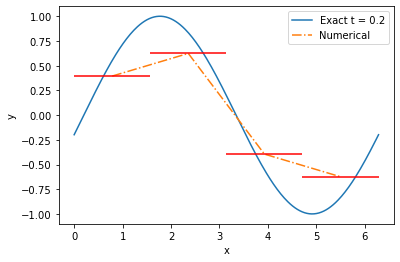

M = 8, error = 3.731397e-01, order = 1.468243e+00


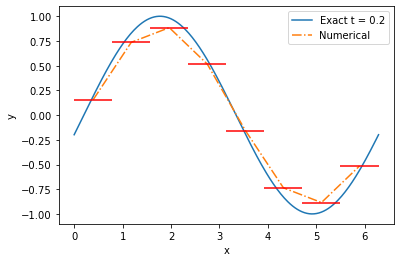

M = 16, error = 1.375380e-01, order = 1.439885e+00


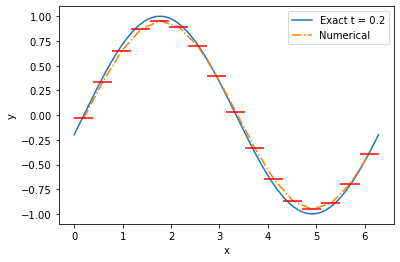

M = 32, error = 4.830912e-02, order = 1.509463e+00


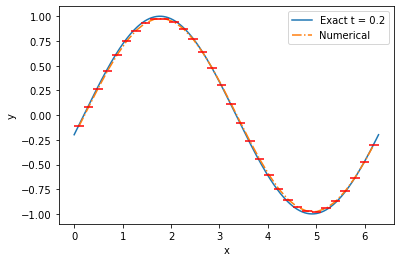

M = 64, error = 1.684322e-02, order = 1.520128e+00


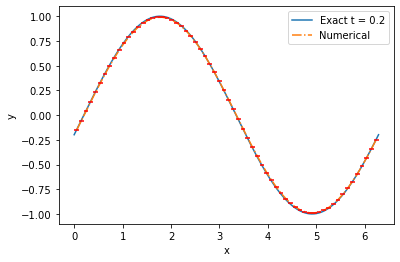

M = 128, error = 5.849552e-03, order = 1.525770e+00


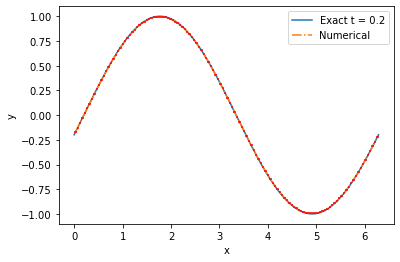

In [21]:
if __name__ == '__main__':

    # 定义精确解ut和初值ft0
    ut = lambda x,t: np.sin(x-t) # 精确解
    ft0 = lambda x: np.sin(x) # 初值
    
    # 计算参数设置
    a = 1 # 常数a的取值
    T = 0.2 # 时间区间
    N = 3 #网格层数(包括第0层)
    M = 4 #初始网格层的网格数
    
    xmin = 0.0 
    xmax = 2*np.pi #取值范围

    ec = 0 # 初始化误差
    # 循环计算
    while (M <= 128):
        
        # 定义Lid动态数组存储叶子单元格的网格编号
        Lid = []
        # 定义sorted_Lid动态数组存储排序后大叶子网格单元的网格编号
        sorted_Lid= []

        # 构建初始等距网格单元(第0层网格单元)
        grid = []
        grid_c = []
        divide_segment(grid_c, xmin, xmax, M)
        grid_c = quicksort_by_length(grid_c)
        grid = grid_c[-M:].copy()
        
        quicksort_by_xmin(grid)
#         for cell in grid:
#             print(cell.xmin)
        
        i = 1
        for cell in grid:
            cell.id = i
            i += 1          
        for i in range(M):
            Lid.append(grid[i].id)#Lid的xmin是乱序的
#         print("Lid:",Lid)    
#         print("len Lid",len(Lid))
        
        #初始网格
        No_OneD_adaptive_mesh_algorithm(xmin, xmax, N, grid, Lid, sorted_Lid, M)
        #进行网格加密
        #OneD_adaptive_mesh_algorithm(xmin, xmax, N, grid, Lid, sorted_Lid, M)
#         print("加密 Lid：",Lid)
#         print("加密 sorted_Lid：",sorted_Lid)
#         for i in sorted_Lid:
#             print(grid[i-1].xmin)

        hmin = find_ml(Lid, grid)#查找最小网格
        #print("hmin    ++++:",hmin)
        dt = 0.1*hmin # 初始化t方向网格常数
        
        t = np.arange(0, T+dt, dt) # 时间数组
        t[-1] = T 
        #print("t:",t)
        nt = len(t) # 时间节点数
        #print("nt:",nt)
        
        u = [[] for i in range(len(t))] #创建多维链表存储数据

        #更新
        for i in sorted_Lid:
            xmin_c = grid[i-1].xmin
            xmax_c = grid[i-1].xmax
            dx = xmax_c - xmin_c
            # 使用 quad 函数计算 ft0 在每个区间上的积分
            avg_ft0, _ = quad(ft0, xmin_c, xmax_c)  # 第二个返回值可以忽略
            u[0].append(avg_ft0 / dx)  # 将平均值赋值给 u 数组
            #print(i,dx, avg_ft0 / dx)

        nx = len(sorted_Lid)
#         print("len Lid",len(Lid))
#         print("nx",nx)
        #print("dx:")
        #离散化
        for n in range(nt-1):
#             print("n:",n)
#             print("sorted_Lid:",sorted_Lid)
            for j in range(nx):
#                 print("j",j)
#                 print("sorted_Lid[j]",sorted_Lid[j])
                dx = grid[sorted_Lid[j]-1].xmax-grid[sorted_Lid[j]-1].xmin
#                 print(n,dx)
                r = a*dt/dx
#                 print("r",r)
#                 print("u[n][j]-r*(u[n][j]-u[n][j-1])",u[n][j]-r*(u[n][j]-u[n][j-1]))
                u[n+1].append(u[n][j]-r*(u[n][j]-u[n][j-1]))
                 
        k = 0  
        error = 0.0
        #print("grid[i-1].xmax-grid[i-1].xmin:")
        for i in sorted_Lid:
            #print(grid[i-1].xmax-grid[i-1].xmin)
            def func(x):
                return (grid[i-1].xmax-grid[i-1].xmin)*(ut(x,T)-u[-1][k])**2
            fArea,err = quad(func,grid[i-1].xmin,grid[i-1].xmax)
            error += fArea
            k += 1
        error = np.sqrt(error)
        order = np.log2(ec/error) # 计算阶数
        ec = error # 当前误差作为前一次误差
        print('M = %d, error = %e, order = %e' % (M, error, order)) # 打印误差与阶数
        
        min_length = find_ml(Lid, grid)

        #可视化
#         for n in range(nt-1):
        x_num = np.array([])
        x_l = np.array([])
        for i in sorted_Lid:
            x_num = np.append(x_num,(grid[i-1].xmax+grid[i-1].xmin)/2)
            x_l = np.append(x_l,grid[i-1].xmin)

        #y_num = u[-1]
        y_num = u[-1]
        #print(y_num)

        x_excat =  np.linspace(0, 2*np.pi, 256)
        y_excat = ut(x_excat, T)
        #y_excat = ut(x_excat, T)

        plt.figure()

        plt.plot(x_excat, y_excat,label='Exact t = %.1f' %T)
        plt.plot(x_num, y_num,'-.',label='Numerical')
        for i in range(len(y_num)-1):
            plt.hlines(y_num[i], x_l[i], x_l[i+1], 'r')
        plt.hlines(y_num[-1],x_l[-1],xmax, 'r')
        
        plt.legend()
        #plt.title('Exact and numerical solutions ')
        plt.xlabel('x')
        plt.ylabel('y')

        M *= 2
        plt.show()


min_length 1.5707963267948966
M = 4, error = 8.515742e-01, order = -inf


C:\Users\Asus\AppData\Local\Temp\ipykernel_20000\3206392841.py:105: RuntimeWarning: divide by zero encountered in log2
  order = np.log2(ec/error) # 计算阶数


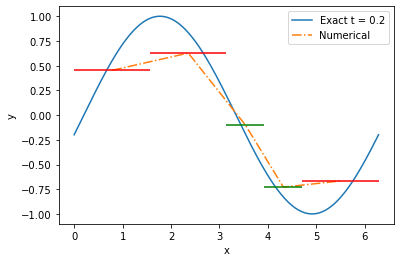

min_length 0.7853981633974483
M = 8, error = 3.464865e-01, order = 1.297333e+00


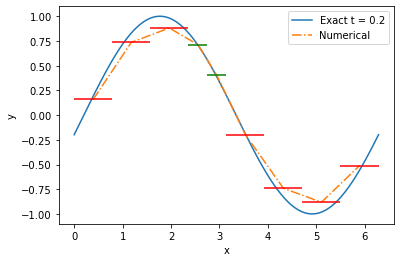

min_length 0.3926990816987237
M = 16, error = 1.304109e-01, order = 1.409734e+00


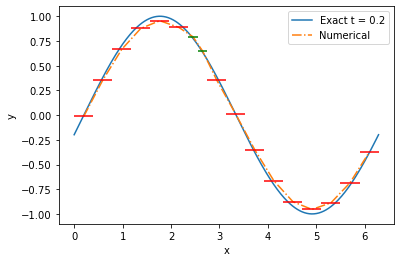

min_length 0.1963495408493614
M = 32, error = 4.703376e-02, order = 1.471296e+00


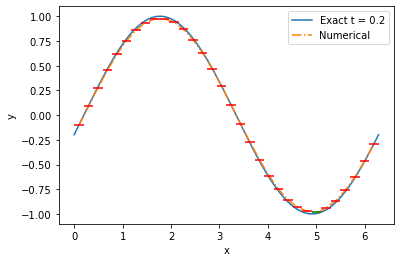

min_length 0.0981747704246807
M = 64, error = 1.650068e-02, order = 1.511171e+00


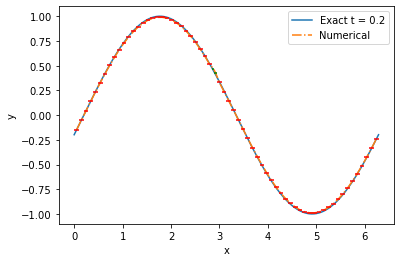

min_length 0.04908738521234035
M = 128, error = 5.860342e-03, order = 1.493469e+00


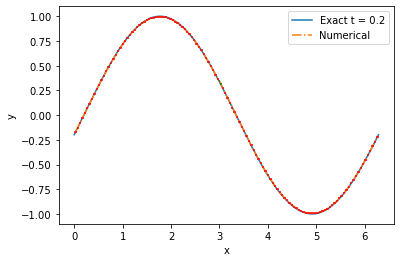

In [20]:
if __name__ == '__main__':

    # 定义精确解ut和初值ft0
    ut = lambda x,t: np.sin(x-t) # 精确解
    ft0 = lambda x: np.sin(x) # 初值
    
    # 计算参数设置
    a = 1 # 常数a的取值
    T = 0.2 # 时间区间
    N = 3 #网格层数(包括第0层)
    M = 4 #初始网格层的网格数
    
    xmin = 0.0 
    xmax = 2*np.pi #取值范围

    ec = 0 # 初始化误差
    # 循环计算
    while (M <= 128):
        
        # 定义Lid动态数组存储叶子单元格的网格编号
        Lid = []
        # 定义sorted_Lid动态数组存储排序后大叶子网格单元的网格编号
        sorted_Lid= []

        # 构建初始等距网格单元(第0层网格单元)
        grid = []
        grid_c = []
        divide_segment(grid_c, xmin, xmax, M)
        grid_c = quicksort_by_length(grid_c)
        grid = grid_c[-M:].copy()
        
        quicksort_by_xmin(grid)
#         for cell in grid:
#             print(cell.xmin)
        
        i = 1
        for cell in grid:
            cell.id = i
            i += 1          
        for i in range(M):
            Lid.append(grid[i].id)#Lid的xmin是乱序的
#         print("Lid:",Lid)    
#         print("len Lid",len(Lid))
        
        #初始网格
        #No_OneD_adaptive_mesh_algorithm(xmin, xmax, N, grid, Lid, sorted_Lid, M)
        #进行网格加密
        OneD_adaptive_mesh_algorithm(xmin, xmax, N, grid, Lid, sorted_Lid, M)
#         print("加密 Lid：",Lid)
#         print("加密 sorted_Lid：",sorted_Lid)
#         for i in sorted_Lid:
#             print(grid[i-1].xmin)

        hmin = find_ml(Lid, grid)#查找最小网格
        #print("hmin    ++++:",hmin)
        dt = 0.1*hmin # 初始化t方向网格常数
        
        t = np.arange(0, T+dt, dt) # 时间数组
        t[-1] = T 
        #print("t:",t)
        nt = len(t) # 时间节点数
        #print("nt:",nt)
        
        u = [[] for i in range(len(t))] #创建多维链表存储数据

        #更新
        for i in sorted_Lid:
            xmin_c = grid[i-1].xmin
            xmax_c = grid[i-1].xmax
            dx = xmax_c - xmin_c
            # 使用 quad 函数计算 ft0 在每个区间上的积分
            avg_ft0, _ = quad(ft0, xmin_c, xmax_c)  # 第二个返回值可以忽略
            u[0].append(avg_ft0 / dx)  # 将平均值赋值给 u 数组
            #print(i,dx, avg_ft0 / dx)

        nx = len(sorted_Lid)
#         print("len Lid",len(Lid))
#         print("nx",nx)
        #print("dx:")
        #离散化
        for n in range(nt-1):
#             print("n:",n)
#             print("sorted_Lid:",sorted_Lid)
            for j in range(nx):
#                 print("j",j)
#                 print("sorted_Lid[j]",sorted_Lid[j])
                dx = grid[sorted_Lid[j]-1].xmax-grid[sorted_Lid[j]-1].xmin
#                 print(n,dx)
                r = a*dt/dx
#                 print("r",r)
#                 print("u[n][j]-r*(u[n][j]-u[n][j-1])",u[n][j]-r*(u[n][j]-u[n][j-1]))
                u[n+1].append(u[n][j]-r*(u[n][j]-u[n][j-1]))
                 
        k = 0  
        error = 0.0
        #print("grid[i-1].xmax-grid[i-1].xmin:")
        for i in sorted_Lid:
            #print(grid[i-1].xmax-grid[i-1].xmin)
            def func(x):
                return (grid[i-1].xmax-grid[i-1].xmin)*(ut(x,T)-u[-1][k])**2
            fArea,err = quad(func,grid[i-1].xmin,grid[i-1].xmax)
            error += fArea
            k += 1
        error = np.sqrt(error)
        order = np.log2(ec/error) # 计算阶数
        ec = error # 当前误差作为前一次误差
        print('M = %d, error = %e, order = %e' % (M, error, order)) # 打印误差与阶数
        
        min_length = find_ml(Lid, grid)

        #可视化
#         for n in range(nt-1):
        x_num = np.array([])
        x_l = np.array([])
        for i in sorted_Lid:
            x_num = np.append(x_num,(grid[i-1].xmax+grid[i-1].xmin)/2)
            x_l = np.append(x_l,grid[i-1].xmin)

        #y_num = u[-1]
        y_num = u[-1]
        #print(y_num)

        x_excat =  np.linspace(0, 2*np.pi, 256)
        y_excat = ut(x_excat, T)
        #y_excat = ut(x_excat, T)

        plt.figure()

        plt.plot(x_excat, y_excat,label='Exact t = %.1f' %T)
        plt.plot(x_num, y_num,'-.',label='Numerical')
        for i in range(len(y_num)-1):
            if round(x_l[i+1]-x_l[i],6) > round(min_length,6):
                plt.hlines(y_num[i], x_l[i], x_l[i+1], 'r')
            else:
                plt.hlines(y_num[i], x_l[i], x_l[i+1], 'g')
        plt.hlines(y_num[-1],x_l[-1],xmax, 'r')
        
        plt.legend()
        #plt.title('Exact and numerical solutions ')
        plt.xlabel('x')
        plt.ylabel('y')

        M *= 2
        plt.show()


In [19]:
# 定义函数 u(x,t)
def u(x, t):
    return np.sin(x - u(x, t) * t)

# 定义隐函数 F(u) = 0
def F(u, x, t):
    return u - np.sin(x - u * t)

# 定义求解隐函数的函数
def solve_u(X, T):
    U = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = X[i, j]
            t = T[i, j]
            u0 = np.sin(x) # 初始猜测值
            U[i, j] = fsolve(F, u0, args=(x, t))
    return U

min_length 1.5707963267948966
M = 4, error = 2.571175e+00, order = -inf


C:\Users\Asus\AppData\Local\Temp\ipykernel_6152\503896286.py:121: RuntimeWarning: divide by zero encountered in log2
  order = np.log2(ec/error) # 计算阶数


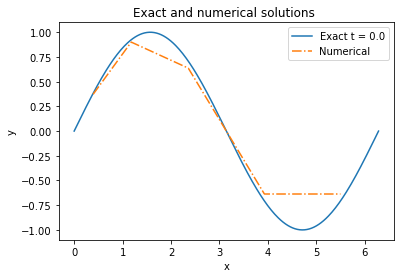

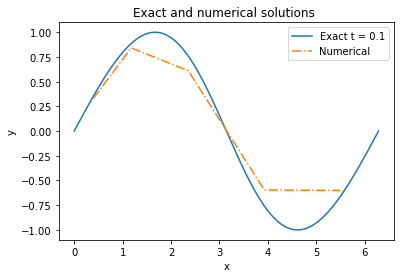

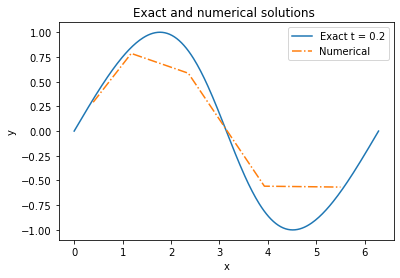

min_length 0.7853981633974483
M = 8, error = 1.104917e+00, order = 1.218490e+00


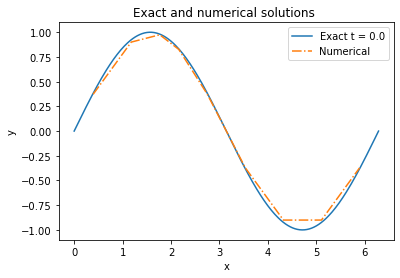

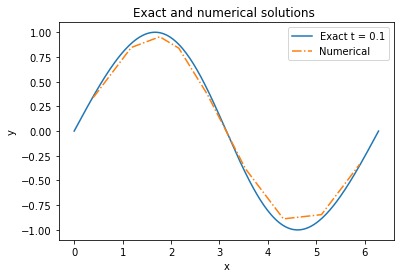

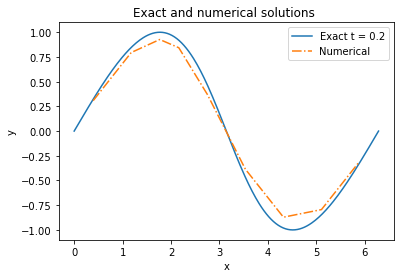

min_length 0.3926990816987237
M = 16, error = 2.745802e-01, order = 2.008638e+00


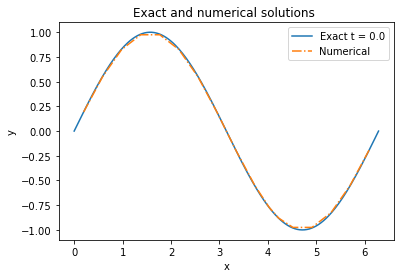

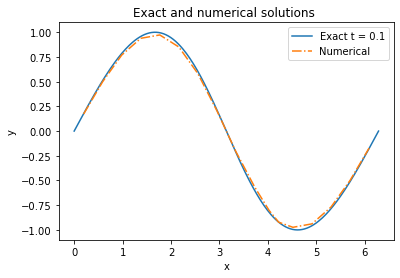

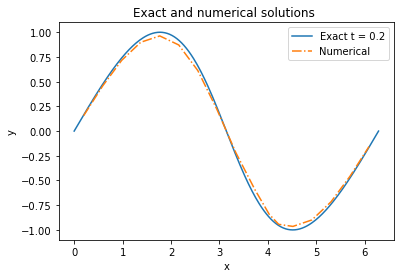

min_length 0.1963495408493614
M = 32, error = 1.498663e-01, order = 8.735518e-01


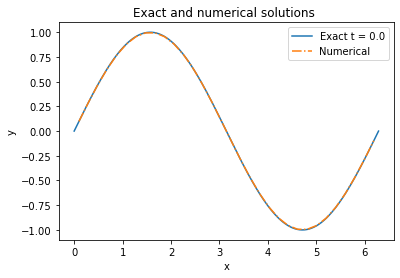

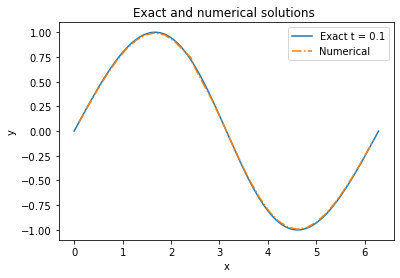

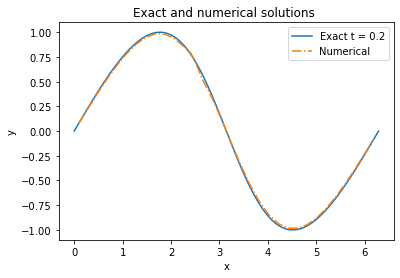

min_length 0.0981747704246807
M = 64, error = 2.070694e-02, order = 2.855490e+00


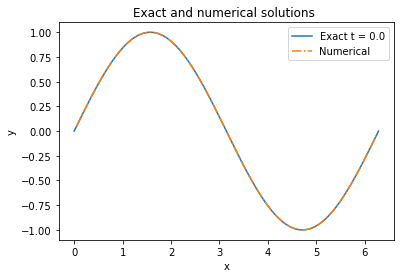

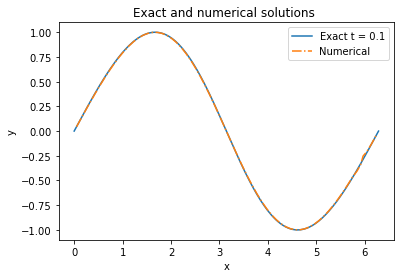

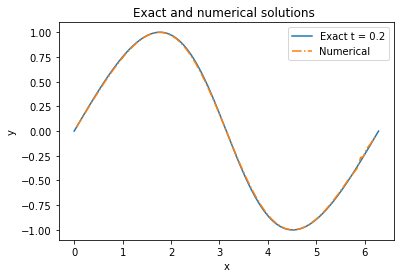

min_length 0.04908738521234035
M = 128, error = 1.322455e-02, order = 6.468956e-01


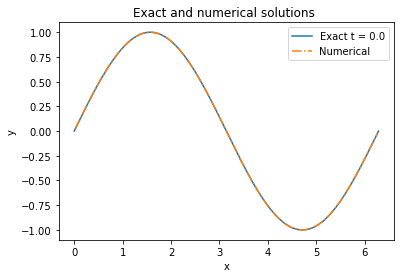

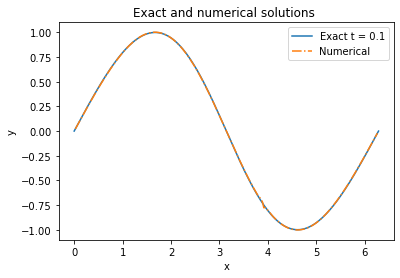

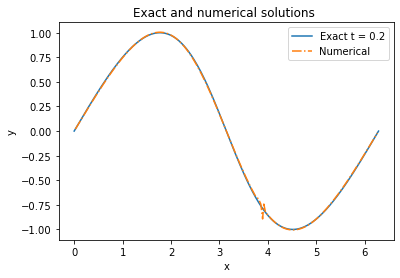

In [20]:
if __name__ == '__main__':

    # 定义精确解ut和初值ft0
    # ut = lambda x,t: np.sin(x-t) # 精确解
    ft0 = lambda x: np.sin(x) # 初值
    
    # 计算参数设置
    a = 1 # 常数a的取值
    T = 0.2 # 时间区间
    N = 3 #网格层数(包括第0层)
    M = 4 #初始网格层的网格数
    alpha = 1
    
    xmin = 0.0 
    xmax = 2*np.pi #取值范围
    
    dt = 0.2/(N-1) # t方向网格常数
#     print(dt)
    
    t = np.arange(0, T+dt, dt) # 时间数组
    #print(t)
    nt = len(t) # 时间节点数
    #print(nt)
    ec = 0 # 初始化误差
    # 循环计算
    while (M <= 128):
        
        u = [[] for i in range(N)] #创建多维链表存储数据
        f = [[] for i in range(N)] 
        # 定义Lid动态数组存储叶子单元格的网格编号
        Lid = []
        # 定义sorted_Lid动态数组存储排序后大叶子网格单元的网格编号
        sorted_Lid= []

        # 构建初始等距网格单元(第0层网格单元)
        grid = []
        grid_c = []
        divide_segment(grid_c, xmin, xmax, M)
        grid_c = quicksort_by_length(grid_c)
        grid = grid_c[-M:].copy()
        
        quicksort_by_xmin(grid)
#         for cell in grid:
#             print(cell.xmin)
        
        i = 1
        for cell in grid:
            cell.id = i
            i += 1          
        for i in range(M):
            Lid.append(grid[i].id)#Lid的xmin是乱序的
            
        #print(Lid)    

        #初始网格
        #No_OneD_adaptive_mesh_algorithm(xmin, xmax, N, grid, Lid, sorted_Lid, M)
        #进行网格加密
        OneD_adaptive_mesh_algorithm(xmin, xmax, N, grid, Lid, sorted_Lid, M)
#         print("加密：",sorted_Lid)
#         for i in sorted_Lid:
#             print(grid[i-1].xmin)

        #更新
        for i in sorted_Lid:
            xmin_c = grid[i-1].xmin
            xmax_c = grid[i-1].xmax
            dx = xmax_c - xmin_c
            # 使用 quad 函数计算 ft0 在每个区间上的积分
            avg_ft0, _ = quad(ft0, xmin_c, xmax_c)  # 第二个返回值可以忽略
            u[0].append(avg_ft0 / dx)  # 将平均值赋值给 u 数组
            f[0].append(((avg_ft0 / dx)**2)/2)
#         print("f[0]",f[0])
#         print("f[0][-1]",f[0][-1])

        nx = len(Lid)
        #print("nx:",nx)
        #print("dx:")
        #有限体积方法离散化
        for n in range(nt-2):
            #print(n)
            for j in range(nx):
                dx = grid[sorted_Lid[j]-1].xmax-grid[sorted_Lid[j]-1].xmin
                #print("j",j)
                #print(n,dx)
                r = a*dt/dx
                if j < (nx-1):
                    #print("j",j,f[n][j-1])
                    F_0 = 0.5*(f[n][j-1]+f[n][j]-alpha*(u[n][j]-u[n][j-1]))
                    F_1 = 0.5*(f[n][j]+f[n][j+1]-alpha*(u[n][j+1]-u[n][j]))
                else:
                    #print("j",j,f[n][j-1])
                    F_0 = 0.5*(f[n][j-1]+f[n][j]-alpha*(u[n][j]-u[n][j-1]))
                    F_1 = 0.5*(f[n][j]+f[n][0]-alpha*(u[n][0]-u[n][j]))
                u[n+1].append(u[n][j]-r*(F_1-F_0))
                f[n+1].append(((u[n][j]-r*(F_1-F_0))**2)/2)
                
        #求精确解
        # 定义 x 和 t 的取值范围和步长
        x_excat = np.linspace(0, 2 * np.pi, M)
        t = np.linspace(0, 0.2, N)
        # 创建网格
        X, T = np.meshgrid(x_excat, t)
        # 求解隐函数
        U = solve_u(X, T)
#         print(U.shape) 
#         print(U[-1])
#         print(len(u), len(u[-1]))
#         print(u[-1])
        k = 0  
        error = 0.0
        #print("grid[i-1].xmax-grid[i-1].xmin:")
        for i in sorted_Lid:
#             print(grid[i-1].xmax-grid[i-1].xmin)
            if k < M:
                def func(x):
                    return (grid[i-1].xmax-grid[i-1].xmin)*(U[-1][k]-u[-1][k])**2
                fArea,err = quad(func,grid[i-1].xmin,grid[i-1].xmax)
                error += fArea
                k += 1
        error = np.sqrt(error)
        order = np.log2(ec/error) # 计算阶数
        ec = error # 当前误差作为前一次误差
        print('M = %d, error = %e, order = %e' % (M, error, order)) # 打印误差与阶数

        #可视化
        for n in range(nt-1):
            x_num = np.array([])
            for i in sorted_Lid:
                x_num = np.append(x_num,(grid[i-1].xmax+grid[i-1].xmin)/2)

            #y_num = u[-1]
            y_num = u[n]
            #print(y_num)
#             x_excat =  np.linspace(0, 2*np.pi, 256)
             
            #y_excat = ut(x_excat, T)
        
            # 绘制图像
            x_excat_plt = np.linspace(0, 2 * np.pi, 256)
            # 创建网格
            X_plt, T = np.meshgrid(x_excat_plt, t)
            # 求解隐函数
            U_plt = solve_u(X_plt, T)
            
            plt.figure()
            plt.plot(x_excat_plt, U_plt[n],label='Exact t = %.1f' % (n*dt))
            plt.plot(x_num, y_num,'-.',label='Numerical')
            plt.legend()
            plt.title('Exact and numerical solutions ')
            plt.xlabel('x')
            plt.ylabel('y')

           
            plt.show()
        M *= 2

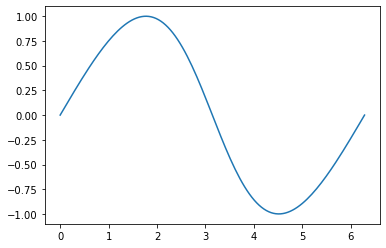

In [21]:
# 定义函数 u(x,t)
def u(x, t):
    return np.sin(x - u(x, t) * t)

# 定义隐函数 F(u) = 0
def F(u, x, t):
    return u - np.sin(x - u * t)

# 定义求解隐函数的函数
def solve_u(X, T):
    U = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = X[i, j]
            t = T[i, j]
            u0 = np.sin(x) # 初始猜测值
            U[i, j] = fsolve(F, u0, args=(x, t))
    return U

# 定义 x 和 t 的取值范围和步长
x = np.linspace(0, 2 * np.pi, 128)
t = np.linspace(0, 0.2, 3)

# 创建网格
X, T = np.meshgrid(x, t)

# 求解隐函数
U = solve_u(X, T)
#print(U)

# # 绘制3D图像
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, T, U)
# plt.show()

# 绘制图像
plt.plot(x, U[-1])
plt.show()